## **PDAN8412 POE Part 2**
### Shivam Mayur Pillay
### ST10134058

The data set is from Bhatt & Dhall (2012), the Skin Segmentation Data Set, the link to this data set is below 

https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

#### __What is logistic regression?__

According to Thanda (2022) Logistic Regression is a type of regression which predicts one of two outcomes such as a classification predicting if a bank transaction is fraudulent or not. Firstly regression is a type of predictive model which attempts to predict a target variable (y variable or dependent variable) using corresponding independent variables (x variables) (Thanda, 2022). This is done by finding the relationship or trends between these varaibles in order to make a prediction (Thanda, 2022).

Logisitic regression is specifically designed to determine a binary outcome which can be a question with a yes or no answer or a positive or negative result as well as other types of dichotomous results/classifications (Thanda, 2022). Meaning the independent varibale needs to binary in nature (Thanda, 2022). The independent variable can be continous or discrete and even nominal or ordinal (with some data wrangling) (Thanda, 2022). There should also be little correlation between the independent variables as multicollinearty can cause issues (Thanda, 2022).

It should be noted that there are also Multinomial and ordinal logistic regression models which are similar to the binary logistice model which will be used for the analysis below (Thanda, 2022). Logistic regression is not able to make a prediction on a continous dependent variabel and it makes an assumption that there is a linear relationship between the dependent and independent variables (Thanda, 2022). 

#### __Why the chosen data set is appropriate for analysis with logistic regression?__

The Skin Segmentation Data Set has 4 columns with the target variable indicating a specific colour is skin or not. The independent varaibles show the amount of of Blue, Green and Red in each observation of colour. This type of analysis can aid in facial recognition software to determine which areas of an image is part of a face. 

This data set is approriate because the dependent variable is a binary classification (Skin or Non-skin) and it is a larger data set which was mentioned as important in the article by Thanda (2022). Additionally all of the independent variables are in a continous ratio format, making it ideal for logistic regression prediction. 

*****
*****

Below we import the data set form a txt file using a pandas function

The Columns are labeled as per the data set description

In [1]:
import pandas as pd

df=pd.read_csv('Skin_NonSkin.txt', sep='\t', header=None, names=['Blue','Green','Red','Skin'])

# (The Pandas Development Team, 2022)

Show the dataframe created below

In [2]:
df

# (Refsnes Data, 2022)

,Blue,Green,Red,Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


Show the shape of the dataframe, we can see there are 245057 observations and 4 columns (or attributes)

In [3]:
df.shape

# (The Pandas Development Team, 2022)

(245057, 4)

We check the data type in each column which shows all values are integers

In [4]:
df.info()

# (The Pandas Development Team, 2022)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Blue    245057 non-null  int64
 1   Green   245057 non-null  int64
 2   Red     245057 non-null  int64
 3   Skin    245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


Count for null values in any column (there are none)

In [5]:
df.isnull().sum()

# (Refsnes Data, 2022)

Blue     0
Green    0
Red      0
Skin     0
dtype: int64

Count the number of unique values in each columnn

In [6]:
df.nunique(axis=0)

# (Refsnes Data, 2022)

Blue     256
Green    256
Red      256
Skin       2
dtype: int64

Change all values labled '2' to '0' to clearly show that it is **_not_** a colour which represents skin

In [7]:
df['Skin'] = df['Skin'].apply(lambda x: 0 if x == 2 else 1)

# (Refsnes Data, 2022)

Below we show a count plot of all values in each column

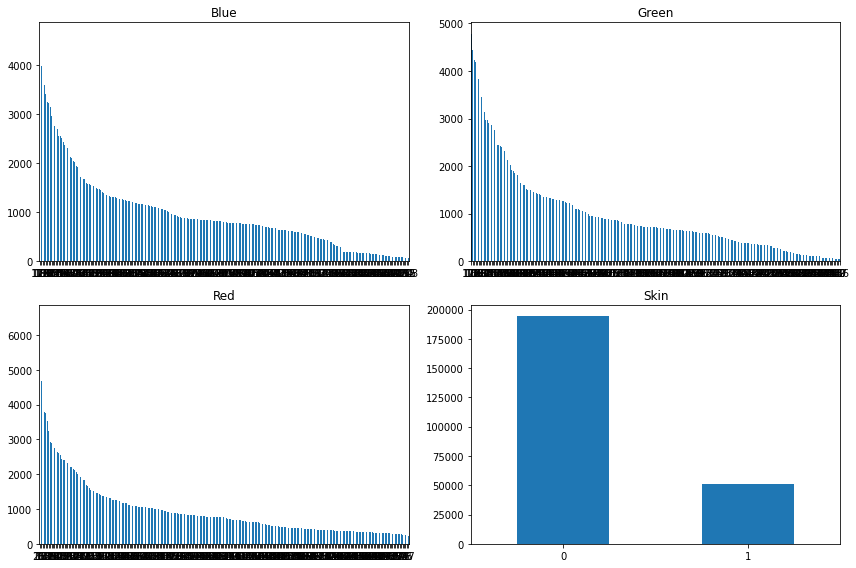

In [8]:
import math
from matplotlib import pyplot as plt

size = math.ceil(df.shape[1]** (1/2))
fig = plt.figure()

for i, col in enumerate(df.columns):
    fig.add_subplot(size, size, i + 1)
    df[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)

fig.tight_layout(rect=(1,1,3,3))

# (The Matplotlib development team, 2022)

Below show the exact count of non-skin and skin values

There is a large difference between the number of observations (_ensure the training and testing split is stratified_)

In [9]:
df['Skin'].value_counts()

# (Refsnes Data, 2022)

0    194198
1     50859
Name: Skin, dtype: int64

Show the correlation between the columns below

In [10]:
df.corr().round(2)

# (Refsnes Data, 2022)

,Blue,Green,Red,Skin
Blue,1.00,0.86,0.50,-0.09
Green,0.86,1.00,0.66,0.12
Red,0.50,0.66,1.00,0.57
Skin,-0.09,0.12,0.57,1.00


Show the correlation above in a heatmap below

Based on the results above and below we see that there is a verry low level of correlation between the target variable and independent variable Blue this could be a concern as there seems to be a relativly high correlation between Blue and Green

The model was run with and without Blue however it showed a lower level of performance, therefore Blue was kept in the model.

<AxesSubplot:>

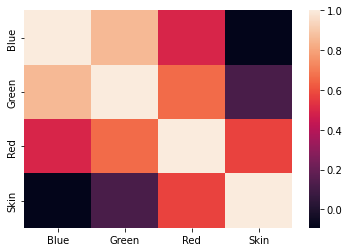

In [11]:
import seaborn as sns

sns.heatmap(df.corr())

# (Seaborn, 2012)

Below set Skin as the Y value (target value) and the rest as the X values

In [12]:
y=df['Skin']
x=df.drop('Skin',axis=1)

# (Refsnes Data, 2022)

Split the dataset into a training and testing set

Ensure that the split is stratified

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split (x,y,train_size=0.8,test_size=0.2,random_state=42,stratify=y)  

# (Scikit-learn Developers, 2022)

Scale the X variables below using the StandardScaler, this function scales each observations independent variables by subtracting the average and then dividing by the standard deviation. This sets all means to 0 and standard deviations to 1

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# (Scikit-learn Developers, 2022)

The Logistic Regression function which looks like an 'S' shape on a set of axis

The Y axis starts at 1 and end at 0

The middle of the 'S' like shape cuts the Y axis at exactly 0.5

Based on the explination thus far one will be able to see that large positive values on the X axis will equal to 1 on the Y axis and large negative values on the X axis will be equal to 0 on the Y axis

The values od 0 and 1 on the X axis are achived by creating the following formula:

*****

1 / ( 1  + _[negative exponentail value of X]_ )

Where
X = an array of the input values

*****

__For the Skin colour analysis conducted if the sigmoid function produces a value between 0 and 0.5 then it would be classified as Non-Skin, if the value is between 0.5 an 1 then it will be classified as Skin__

The sigmoid equation is built in the cell below 


(Dash, 2022)

In [15]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

# (AssemblyAI, 2022)

Showing the sigmoind function created above

Create a numpy array starting at -10 and ending at 10 with an interval of 0.5 on the graph below for the x axis

Create a corresponding y axis with the function created above

The Red Line shows where the Y axis is cut by the 'S' shape

The black line show the Y axis

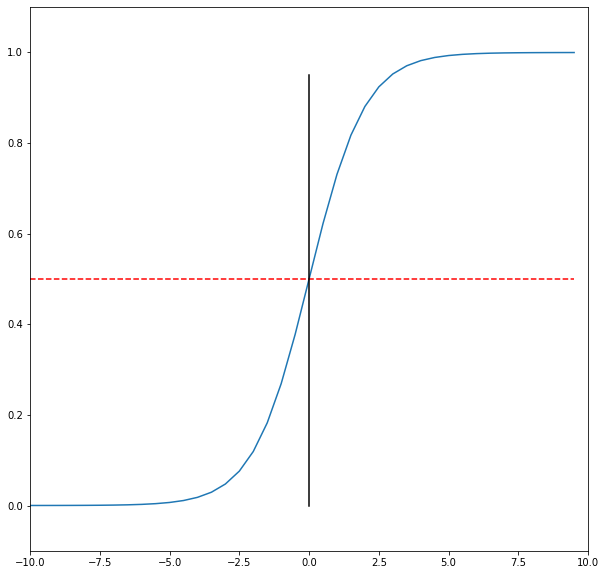

In [16]:
x_axis = np.arange(-10, 10, 0.5)
y_axis = sigmoid(x_axis)

red_line = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
black_linex = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
black_liney = np.arange(0, 1, 0.05)

plt.figure(figsize=(10,10))
plt.plot(x_axis, y_axis)
plt.plot(x_axis, red_line, linestyle='dashed', color='red')
plt.plot(black_linex, black_liney , linestyle='solid', color='black')

plt.xlim(-10,10)
plt.ylim(-0.1,1.1)

plt.show()


# (NumPy Developers, 2022)
# (The Matplotlib development team, 2022)


We now build the LR model using the sigmoid function created above

To build the model we need to include a cost function and use the gradient decent method

__Cost Function__: This function will show how much the predicted values differe from the actual values. In this analysis it will determin whether or not the model was able to predict if the colour was Skin or Non-skin and how far off it was (ie: below 0.5 is Non-skin and above is Skin). For example if the model makes a prediction that it is Skin when it was actually Non-skin then the model will show a difference between the actual and predicition. When the loss function is plotted after each "try/guess" by the model is plotted onto a set of axis it will look like an inverted bell shape (convex shape) where the lowest point shows the smallest errors. The objective it to find the lowest point on that graph (the smallest cost/lost possible) to find the most efficent model, this is done using gradient descent.

__Gradient Descent__: This is the function which optimizes the model based on the cost function (loss function). This considers the loss seen in the previous iteration of the model and determins the amount of change needed in the weights and bias of the model to find a lower cost/loss in the models predictability. IF you have to explain it in terms of the inverted bell curve, this function would determine how steep the point is at which the the loss function is at, then based on this the weights and bias will be changed by a predetermined learning rate. 
*****
__More specifically** Gradient is worked out with the formula__:


(the previous weight/bias from the previous iteration) - (the graidents of the weight and bias at that point * the learning rate)   
*****


__NB**__ Notes are in the middle of each definition


(Dash, 2022)

In [17]:
# Below we us the Class function explianed in Refsnes Data (2022) 

class LogisticRegression():
    
    # 1st I need to create the Learning Rate and the number of Iterations the model will run through to find the optimal model fit
    # Set the default learning rate and iterations to 0.01 and 10  
    # Start the weights and bias at 0 
    
    def __init__(self, lr=0.01, iters=10):
        self.lr = lr
        self.iters = iters
        self.weights = 0
        self.bias = 0
        
    # For the **Training** Stage
    # Here we need to create the number of weights that will correspond to each feature (like each coeffiecient for each independent variable)
    # Set an 1 bias as 0
    
    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Now we need to feed the ALL of the x values multipled by the weights
        # Add the bias
        # Then feed to the sigmoid function we created earlier to create a prediction
        
        for _ in range(self.iters):
            lin_pred = np.dot(x, self.weights) + self.bias
            sig_pred = sigmoid(lin_pred)

            # Here we are calculating the graidents for the weights and bias
            
            dw = (1/n_samples) * np.dot(x.T, (sig_pred - y))
            db = (1/n_samples) * np.sum(sig_pred-y)

            # Here we now change the weighs and bias for the next iteration (the change is due to the learning rate set above)
             
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    # Here we create predictions for the **TESTING** Stage
    # 1st part is the same as when we created a prediction in the Training stage BUT we create a new variable for the  
    
    def predict(self, x):
        lin_pred = np.dot(x, self.weights) + self.bias
        y_pred = sigmoid(lin_pred)
        
        # Here we state that when the Y value falls below or equal to 0.5 then it is Non-skin but if the value is greater than 1 then it is skin 
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
    
     
# (AssemblyAI, 2022)

Now we asses how well the model makes predictions

We find that the models accuracy is around: 

__87.32%__

In [18]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

# (AssemblyAI, 2022)

0.8731535134252836


To try improve the model we adjust the hypertuning perameters

The learning rate is increased to take __1__ whole step each time  

The number of iterations is increased to __100__

In [19]:
LR_model = LogisticRegression(lr=1,iters=100)
LR_model.fit(x_train,y_train)
y_pred = LR_model.predict(x_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

# (AssemblyAI, 2022)

0.9174691912184771


The model is now able to predict wheter a specific colour is Skin or Non-skin with __91.75%__ accuracy

*****
*****
*****

# Reference list 

AssemblyAI (2022) How to implement Logistic Regression from scratch with Python. [Online]. 14 September 2022. www.youtube.com. Available at: https://www.youtube.com/watch?v=YYEJ_GUguHw&ab_channel=AssemblyAI (Accessed: 15 October 2022).

Bhatt, R. and Dhall, A. (2012) UCI Machine Learning Repository: Skin Segmentation Data Set. [Online]. 17 July 2012. Available at: https://archive.ics.uci.edu/ml/datasets/skin+segmentation (Accessed: 13 October 2022).

Dash, S.K. (2022) Implementing Logistic Regression from Scratch using Python. [Online]. 3 February 2022. Available at: https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/ (Accessed: 17 October 2022).

NumPy Developers (2022) NumPy: the absolute basics for beginners — NumPy v1.22 Manual. [Online]. 2022. Available at: https://numpy.org/doc/stable/user/absolute_beginners.html#:~:text=NumPy%20can%20be%20used%20to (Accessed: 17 October 2022).

Python Software Foundation (2009) Python 3.7.2 documentation. [Online]. 2009. Available at: https://www.python.org/ (Accessed: 17 October 2022).

Refsnes Data (2022) Learn Python. [Online]. 2022. Available at: https://www.w3schools.com/python/default.asp (Accessed: 17 October 2022).

Scikit-learn Developers (2022) scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [Online]. 2022. Available at: https://scikit-learn.org/stable/index.html (Accessed: 17 October 2022).

Seaborn (2012) seaborn: statistical data visualization — seaborn 0.9.0 documentation. [Online]. 2012. Available at: https://seaborn.pydata.org/ (Accessed: 17 October 2022).

Thanda, A. (2022) What is Logistic Regression? [Online]. 4 October 2022. Available at: https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/ (Accessed: 15 October 2022).

The Matplotlib development team (2022) Matplotlib: Python plotting — Matplotlib 3.3.4 documentation. [Online]. 2022. Available at: https://matplotlib.org/stable/index.html (Accessed: 17 October 2022).

The Pandas Development Team (2022) Pandas Documentation. [Online]. 6 April 2022. Available at: https://pandas.pydata.org/docs/index.html (Accessed: 17 October 2022).